In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import re
import nltk
nltk.download()
from gensim import corpora, models
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [4]:
df = pd.read_csv("DataSetMaster.csv") # reading the dataset
dfo = df # making a copy of the dataset
df, dfo = train_test_split(df, test_size = 0.3)# splitting into test and train data

In [5]:
df = pd.DataFrame(df)
df.head()

,Review,Class
5933,I have one female cat that weighs under 10 pou...,Pet Supplies
5764,"Our lab carries around sticks, rocks, you name...",Pet Supplies
12184,"When I first got this movie, I was expecting a...",CD & Vinyl
9880,Got this game for my birthday last year. I lov...,ToysAndGames
20125,"I don't know, but from now on, I won't. It is ...",HomeAndKitchen


In [6]:
stoplist = set(stopwords.words("english"))


{'more', 'after', 'll', 'haven', 'on', 'about', 'why', 'an', 'with', 'where', 'won', 'who', 'we', 'a', 'its', 'wasn', 'o', 'but', 'y', 'her', 'can', 'be', 'very', 'should', 'whom', 're', 'while', 'yourself', 'have', 'off', 'against', 'shan', 'are', 'does', 'those', 'just', 'as', 'each', 'such', 'not', 'wouldn', 've', 'once', 'has', 'of', 'too', 'their', 'theirs', 'mightn', 'most', 'me', 'both', 'over', 't', 'isn', 'am', 'to', 'himself', 'ain', 'out', 'were', 'they', 'them', 'here', 'when', 'up', 'between', 'you', 'same', 'at', 'ourselves', 'd', 'nor', 'she', 'then', 'him', 'don', 'some', 'i', 'will', 'above', 'what', 'there', 'for', 'into', 'below', 'no', 'before', 'under', 'own', 'than', 'other', 'down', 'themselves', 'needn', 'didn', 'doing', 'his', 'and', 'any', 'couldn', 'the', 'until', 'was', 'had', 'that', 'this', 'shouldn', 'our', 'yourselves', 'do', 'hasn', 'having', 'again', 'weren', 'from', 'herself', 'how', 'further', 'all', 'is', 'm', 'did', 'or', 'few', 'if', 'myself', 'my

In [31]:
stoplist.update(['a',
'able',
'about',
'above',
'abst',
'accordance',
'according',
'accordingly',
'across',
'act',
'actually',
'added',
'adj',
'affected',
'affecting',
'affects',
'after',
'afterwards',
'again',
'against',
'ah',
'all',
'almost',
'alone',
'along',
'already',
'also',
'although',
'always',
'am',
'among',
'amongst',
'an',
'and',
'announce',
'another',
'any',
'anybody',
'anyhow',
'anymore',
'anyone',
'anything',
'anyway',
'anyways',
'anywhere',
'apparently',
'approximately',
'are',
'aren',
'arent',
'arise',
'around',
'as',
'aside',
'ask',
'asking',
'at',
'auth',
'available',
'away',
'awfully',
'b',
'back',
'be',
'became',
'because',
'become',
'becomes',
'becoming',
'been',
'before',
'beforehand',
'begin',
'beginning',
'beginnings',
'begins',
'behind',
'being',
'believe',
'below',
'beside',
'besides',
'between',
'beyond',
'biol',
'both',
'brief',
'briefly',
'but',
'by',
'c',
'ca',
'came',
'can',
'cannot',
'cant',
'cause',
'causes',
'certain',
'certainly',
'co',
'com',
'come',
'comes',
'contain',
'containing',
'contains',
'could',
'couldnt',
'd',
'date',
'did',
'didnt',
'different',
'do',
'does',
'doesnt',
'doing',
'done',
'dont',
'down',
'downwards',
'due',
'during',
'e',
'each',
'ed',
'edu',
'effect',
'eg',
'eight',
'eighty',
'either',
'else',
'elsewhere',
'end',
'ending',
'enough',
'especially',
'et',
'et-al',
'etc',
'even',
'ever',
'every',
'everybody',
'everyone',
'everything',
'everywhere',
'ex',
'except',
'f',
'far',
'few',
'ff',
'fifth',
'first',
'five',
'fix',
'followed',
'following',
'follows',
'for',
'former',
'formerly',
'forth',
'found',
'four',
'from',
'further',
'furthermore',
'g',
'gave',
'get',
'gets',
'getting',
'give',
'given',
'gives',
'giving',
'go',
'goes',
'gone',
'got',
'gotten',
'h',
'had',
'happens',
'hardly',
'has',
'hasnt',
'have',
'havent',
'having',
'he',
'hed',
'hence',
'her',
'here',
'hereafter',
'hereby',
'herein',
'heres',
'hereupon',
'hers',
'herself',
'hes',
'hi',
'hid',
'him',
'himself',
'his',
'hither',
'home',
'how',
'howbeit',
'however',
'hundred',
'i',
'id',
'ie',
'if',
'ill',
'im',
'immediate',
'immediately',
'importance',
'important',
'in',
'inc',
'indeed',
'index',
'information',
'instead',
'into',
'invention',
'inward',
'is',
'isnt',
'it',
'itd',
'itll',
'its',
'itself',
'ive',
'j',
'just',
'k',
'keep',
'keeps',
'kept',
'kg',
'km',
'know',
'known',
'knows',
'l',
'largely',
'last',
'lately',
'later',
'latter',
'latterly',
'least',
'less',
'lest',
'let',
'lets',
'like',
'liked',
'likely',
'line',
'little',
'll',
'look',
'looking',
'looks',
'ltd',
'm',
'made',
'mainly',
'make',
'makes',
'many',
'may',
'maybe',
'me',
'mean',
'means',
'meantime',
'meanwhile',
'merely',
'mg',
'might',
'million',
'miss',
'ml',
'more',
'moreover',
'most',
'mostly',
'mr',
'mrs',
'much',
'mug',
'must',
'my',
'myself',
'n',
'na',
'name',
'namely',
'nay',
'nd',
'near',
'nearly',
'necessarily',
'necessary',
'need',
'needs',
'neither',
'never',
'nevertheless',
'new',
'next',
'nine',
'ninety',
'no',
'nobody',
'non',
'none',
'nonetheless',
'noone',
'nor',
'normally',
'nos',
'not',
'noted',
'nothing',
'now',
'nowhere',
'o',
'obtain',
'obtained',
'obviously',
'of',
'off',
'often',
'oh',
'ok',
'okay',
'old',
'omitted',
'on',
'once',
'one',
'ones',
'only',
'onto',
'or',
'ord',
'other',
'others',
'otherwise',
'ought',
'our',
'ours',
'ourselves',
'out',
'outside',
'over',
'overall',
'owing',
'own',
'p',
'page',
'pages',
'part',
'particular',
'particularly',
'past',
'per',
'perhaps',
'placed',
'please',
'plus',
'poorly',
'possible',
'possibly',
'potentially',
'pp',
'predominantly',
'present',
'previously',
'primarily',
'probably',
'promptly',
'proud',
'provides',
'put',
'q',
'que',
'quickly',
'quite',
'qv',
'r',
'ran',
'rather',
'rd',
're',
'readily',
'really',
'recent',
'recently',
'ref',
'refs',
'regarding',
'regardless',
'regards',
'related',
'relatively',
'research',
'respectively',
'resulted',
'resulting',
'results',
'right',
'run',
's',
'said',
'same',
'saw',
'say',
'saying',
'says',
'sec',
'section',
'see',
'seeing',
'seem',
'seemed',
'seeming',
'seems',
'seen',
'self',
'selves',
'sent',
'seven',
'several',
'shall',
'she',
'shed',
'shell',
'shes',
'should',
'shouldnt',
'show',
'showed',
'shown',
'showns',
'shows',
'significant',
'significantly',
'similar',
'similarly',
'since',
'six',
'slightly',
'so',
'some',
'somebody',
'somehow',
'someone',
'somethan',
'something',
'sometime',
'sometimes',
'somewhat',
'somewhere',
'soon',
'sorry',
'specifically',
'specified',
'specify',
'specifying',
'still',
'stop',
'strongly',
'sub',
'substantially',
'successfully',
'such',
'sufficiently',
'suggest',
'sup',
'sure',
't',
'take',
'taken',
'taking',
'tell',
'tends',
'th',
'than',
'thank',
'thanks',
'thanx',
'that',
'thatll',
'thats',
'thatve',
'the',
'their',
'theirs',
'them',
'themselves',
'then',
'thence',
'there',
'thereafter',
'thereby',
'thered',
'therefore',
'therein',
'therell',
'thereof',
'therere',
'theres',
'thereto',
'thereupon',
'thereve',
'these',
'they',
'theyd',
'theyll',
'theyre',
'theyve',
'think',
'this',
'those',
'thou',
'though',
'thoughh',
'thousand',
'throug',
'through',
'throughout',
'thru',
'thus',
'til',
'tip',
'to',
'together',
'too',
'took',
'toward',
'towards',
'tried',
'tries',
'truly',
'try',
'trying',
'ts',
'twice',
'two',
'u',
'un',
'under',
'unfortunately',
'unless',
'unlike',
'unlikely',
'until',
'unto',
'up',
'upon',
'ups',
'us',
'use',
'used',
'useful',
'usefully',
'usefulness',
'uses',
'using',
'usually',
'v',
'value',
'various',
've',
'very',
'via',
'viz',
'vol',
'vols',
'vs',
'w',
'want',
'wants',
'was',
'wasnt',
'way',
'we',
'wed',
'welcome',
'well',
'went',
'were',
'werent',
'weve',
'what',
'whatever',
'whatll',
'whats',
'when',
'whence',
'whenever',
'where',
'whereafter',
'whereas',
'whereby',
'wherein',
'wheres',
'whereupon',
'wherever',
'whether',
'which',
'while',
'whim',
'whither',
'who',
'whod',
'whoever',
'whole',
'wholl',
'whom',
'whomever',
'whos',
'whose',
'why',
'widely',
'willing',
'wish',
'with',
'within',
'without',
'wont',
'words',
'world',
'would',
'wouldnt',
'www',
'x',
'y',
'yes',
'yet',
'you',
'youd',
'youll',
'your',
'youre',
'yours',
'yourself',
'yourselves',
'youve',
'z',
'zero'])

In [32]:
stoplist

{'a',
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'added',
 'adj',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'again',
 'against',
 'ah',
 'ain',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apparently',
 'approximately',
 'are',
 'aren',
 'arent',
 'arise',
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'at',
 'auth',
 'available',
 'away',
 'awfully',
 'b',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'begin',
 'beginning',
 'beginnings',
 'begins',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'biol',
 'both',
 'brief',
 'briefly',
 'but',
 'by',
 'c',
 'ca',
 'came',
 'ca

In [33]:
clean_data = []
for review in df.values:
        # Remove punctuations
        
        review[0] = re.sub(r'[^a-zA-Z]', ' ', review[0])
        # To lowercase
        review[0] = review[0].lower()
        # Remove stop words
        texts = [word for word in review[0].lower().split() if word not in stoplist]
        try:
            #review[0].append(' '.join(texts))
            review[0] = ' '.join(texts)
        except:
            pass

In [34]:
df.values[1009]

array([ 'secret nimh told contained story epic loose ends left tantalize imagination ii picks threads tale weaves equally stirring saga adding shocking plot twists rousing musical numbers good measure tradition favorite plot devices learn young timothy brisby destiny fulfill chosen journeys rats thorn valley film wondered sort utopian society rats create liberated hide farmhouse rosebush nimh delivers greater spectacle conceived wondrous splendor thorn valley meets time benefactors justin ages brutus guard appearance finally speaks providing characterization appearance film nimh brutus favorite animated characters characters including jenny mouse cecil bug surprises pop spoil remember mice sucked ventilation system attempting escape nimh killed gut wrenching shock revelation timothy brother martin turned dark side star talent contributes journey ralph macchio eric idle continues tradition lending voice talents awesome animated sagas providing depth feeling charming characters best dom 

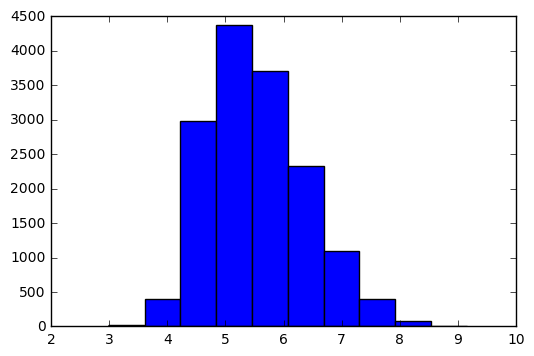

In [35]:
import matplotlib.pyplot as plt
lens = []
for i in df.values:
    lens.append(np.log(len(i[0])))
plt.hist(lens)
plt.show()

In [36]:
categories = df['Class'].unique()

In [13]:
categories.shape

(22,)

In [37]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['Review'])
X_train_counts

<15400x43921 sparse matrix of type '<class 'numpy.int64'>'
	with 675525 stored elements in Compressed Sparse Row format>

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(15400, 43921)

In [39]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(15400, 43921)

In [40]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, df['Class'])
clf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
logistic = logistic.fit(X_train_tfidf, df['Class'])


#docs_new = ["Quality of cards, money, houses,hotels are best. Houses and Hotels are made of wood. The dices are also of wood with numbers on them which are better than dices with dots. Good bank central bracket to keep money and cards which has separate sections for for everything. Tokens are heavy and good quality and made of brass which are better than plastic tokens. Overall a steal away at this price and this game is fun to play with friends and family. Flipkart delivered this product in 3 days."]
#docs_new = ["Henry Winkler stars in this remake of the classic tale of Scrooge.  This one is set in post-Depression era America and is oneof the best I've ever seen.  Winkler is equally at ease as a young man with a girlfriend or an old man with an attitude.  I watch this every Christmas and was delighted to discover it on DVD.  You'll love it!"]
docs_new = ["I've been ordering these for more than 1.5 years now. My pup likes to chew them and it keeps her busy for about an hour since she's small in size. The quality is fine and I have always received it in good condition. For the new pet owners, these pressed bone holds your pup attention for a while and are very helpful. Although buy the size suitable to your dog's breed."]
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predictedMNB = logistic.predict(X_new_tfidf)
#predicted
for doc, category in zip(docs_new, predictedMNB):
    print('%r => %s' % (doc, category))

"I've been ordering these for more than 1.5 years now. My pup likes to chew them and it keeps her busy for about an hour since she's small in size. The quality is fine and I have always received it in good condition. For the new pet owners, these pressed bone holds your pup attention for a while and are very helpful. Although buy the size suitable to your dog's breed." => Pet Supplies


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier(n_estimators=100, max_depth=None,
    min_samples_split=10, random_state=0)),
])

In [44]:
text_clf = text_clf.fit(df['Review'], df['Class'])
#docs_test = dfo.values
predicted = text_clf.predict(dfo['Review'])
np.mean(predicted == dfo['Class'])         


0.82999999999999996

In [42]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, n_iter=5, random_state=)),
])
text_clf = text_clf.fit(df['Review'], df['Class'])
predicted = text_clf.predict(dfo['Review'])
np.mean(predicted == dfo['Class']) 

SyntaxError: invalid syntax (<ipython-input-42-185ab04058ba>, line 5)

In [23]:
from sklearn import metrics
print(metrics.classification_report(dfo['Class'], predicted,
    target_names=categories))

                          precision    recall  f1-score   support

   Cellphone Accessories       0.86      0.95      0.90       276
              Automobile       0.93      0.84      0.88       317
            digitalmusic       0.85      0.80      0.82       293
    Clothing & Jewellery       0.82      0.91      0.86       265
       patio&lawn&garden       0.92      0.79      0.85       306
                  Beauty       0.77      0.88      0.82       306
            Pet Supplies       0.90      0.85      0.88       320
       music instruments       0.89      0.73      0.80       302
             Movies & TV       0.84      0.81      0.83       286
                  Health       0.89      0.84      0.86       315
             CD & Vinyl        0.87      0.89      0.88       306
             Electronics       0.88      0.90      0.89       295
                 grocery       0.80      0.95      0.87       278
        Apps for Android       0.87      0.72      0.79       315
         

In [24]:
metrics.confusion_matrix(dfo['Class'], predicted)

array([[261,   1,   0,   1,   1,   0,   0,   0,   0,   0,   6,   1,   0,
          1,   0,   1,   0,   0,   0,   1,   0,   2],
       [  3, 266,   1,   0,   0,   7,   0,   2,   0,   0,   0,   0,   1,
          0,   0,   8,   1,   1,   0,   1,   0,  26],
       [  0,   0, 235,   2,   0,   6,   2,   2,   3,   8,   0,   2,   4,
          4,  10,   1,   0,   0,   2,   6,   6,   0],
       [  0,   0,   1, 241,   0,   2,   1,   0,   6,   0,   0,   2,   1,
          4,   0,   1,   1,   0,   3,   0,   2,   0],
       [  8,   0,   1,   0, 241,   0,   0,   0,   0,   0,  23,   1,   0,
          0,   0,   0,   2,  25,   1,   4,   0,   0],
       [  1,   0,   5,   0,   0, 269,   2,   6,   3,   3,   0,   6,   0,
          5,   0,   0,   0,   1,   1,   4,   0,   0],
       [  2,   0,   2,   4,   1,   9, 273,   3,   0,   0,   1,   0,   3,
          3,   1,   6,   5,   0,   1,   2,   3,   1],
       [  0,   6,   5,   1,   6,  27,   2, 220,   8,   2,   3,   5,   0,
          0,   2,   1,   1,   4,   0, 

In [27]:
from sklearn.tree import DecisionTreeClassifier
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf',  DecisionTreeClassifier(max_depth=200)),
])
text_clf = text_clf.fit(df['Review'], df['Class'])
predicted = text_clf.predict(dfo['Review'])
np.mean(predicted == dfo['Class']) 

0.67606060606060603

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC


In [52]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf',  MLPClassifier(alpha=1)),
])
text_clf = text_clf.fit(df['Review'], df['Class'])
predicted = text_clf.predict(dfo['Review'])
np.mean(predicted == dfo['Class']) 

0.76484848484848489

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
#logistic.fit(df['Review'], df['Class'])
logReg = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf',  LogisticRegression()),
])
logReg = logReg.fit(df['Review'], df['Class'])
predicted = logReg.predict(dfo['Review'])
np.mean(predicted == dfo['Class'])
#below line not required 


0.88969696969696965

In [20]:
#Purely for testing--- Delete later
from sklearn import metrics
#probs = model.predict_proba(X_test)
#--predicted
preds = predicted

fpr, tpr, threshold = metrics.roc_curve(dfo['Class'], preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


ValueError: Data is not binary and pos_label is not specified

In [1]:
"I've been ordering these for more than 1.5 years now. My pup likes to chew them and it keeps her busy for about an hour since she's small in size. The quality is fine and I have always received it in good condition. For the new pet owners, these pressed bone holds your pup attention for a while and are very helpful. Although buy the size suitable to your dog's breed."

"I've been ordering these for more than 1.5 years now. My pup likes to chew them and it keeps her busy for about an hour since she's small in size. The quality is fine and I have always received it in good condition. For the new pet owners, these pressed bone holds your pup attention for a while and are very helpful. Although buy the size suitable to your dog's breed."

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SVC()),
])
text_clf = text_clf.fit(df['Review'], df['Class'])
predicted = text_clf.predict(dfo['Review'])
np.mean(predicted == dfo['Class'])